**What is Market Basket Analysis ?**

Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. 
It works by looking for combinations of items that occur together frequently in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy.

# Market Basket Analysis For Foodmart Store Dataset

**About Foodmart**

Food Mart (FM) is a chain of convenience stores in the United States. The private company's headquarters are located in Mentor, Ohio, and there are currently approximately **325 stores located in the US**. Food Mart operates on the franchise system.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import networkx as nx
import matplotlib as mpl
import gapminder as gapminder


%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
## Get Multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)

## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Loading Customers Dataset

In [3]:
customer = pd.read_csv("data/customer.csv")
customer.head()

,customer_id,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned
0,1,Tlaxiaco,Oaxaca,Mexico,30,$30K - $50K,F,4,2,Partial High School,10/09/91,Bronze,Skilled Manual,Y,4
1,2,Sooke,BC,Canada,101,$70K - $90K,M,1,0,Partial High School,11/03/93,Bronze,Professional,N,3
2,3,Issaquah,WA,USA,21,$50K - $70K,F,1,1,Bachelors Degree,11/06/91,Bronze,Professional,Y,2
3,4,Burnaby,BC,Canada,92,$10K - $30K,M,4,4,Partial High School,21/05/94,Normal,Skilled Manual,N,2
4,5,Novato,CA,USA,42,$30K - $50K,F,3,0,Partial College,21/08/92,Silver,Manual,N,3


### Loading Products Dataset

In [4]:
product = pd.read_csv("data/product.csv")
product.head()

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,0,0,30,14,16.9,12.60,7.40
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,0,1,18,8,13.4,3.71,22.60
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,1,1,17,13,14.4,11.00,7.77
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,1,0,26,10,22.9,18.90,7.93
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,1,0,7,10,20.7,21.90,19.20


### Loading Departments Dataset

In [5]:
product_class = pd.read_csv("data/product_class.csv")
product_class.head()

,product_class_id,subcategory,category,department,family
0,1,Nuts,Specialty,Produce,Food
1,2,Shellfish,Seafood,Seafood,Food
2,3,Canned Fruit,Fruit,Canned Products,Food
3,4,Spices,Baking Goods,Baking Goods,Food
4,5,Pasta,Starchy Foods,Starchy Foods,Food


### Loading Region Dataset

In [6]:
region = pd.read_csv("data/region.csv")
region.head()

,region_id,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id
0,0,None,None,No District,No Region,No Country,0
1,1,San Francisco,CA,San Francisco,Central West,USA,123
2,2,Mexico City,DF,Mexico City,Mexico Central,Mexico,118
3,3,Los Angeles,CA,Los Angeles,South West,USA,116
4,4,Guadalajara,Jalisco,Guadalajara,Mexico West,Mexico,114


### Loading Sales Dataset

In [7]:
df = pd.read_csv("data/sales.csv")
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales
0,337,371,6280,2,1.50,0.5100,2
1,1512,371,6280,2,1.62,0.6318,3
2,963,371,4018,2,2.40,0.7200,1
3,181,371,4018,2,2.79,1.0323,3
4,1383,371,4018,2,5.18,2.1756,2


### Loading Stores Dataset

In [8]:
store = pd.read_csv("data/store.csv")
store.head()

,store_id,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,0,HeadQuarters,0,HQ,0,1 Alameda Way,Alameda,CA,55555,USA,Sam,178-555-8979,124-555-9116,########,4/12/1990 0:00,25638,18697,3648,3293,0,0,0,0,0
1,1,Supermarket,28,Store 1,1,2853 Bailey Rd,Acapulco,Guerrero,55555,Mexico,Jones,262-555-5124,262-555-5121,9/1/1982 0:00,5/12/1990 0:00,23593,17475,3671,2447,0,0,0,0,0
2,2,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0
3,3,Supermarket,76,Store 3,3,1501 Ramsey Circle,Bremerton,WA,55555,USA,Davis,509-555-1596,509-555-1591,14/6/1959 0:00,19/11/1967 0:00,39696,24390,9184,6122,0,0,1,1,0
4,4,Gourmet Supermarket,27,Store 4,4,433 St George Dr,Camacho,Zacatecas,55555,Mexico,Johnson,304-555-1474,304-555-1471,27/9/1994 0:00,1/12/1995 0:00,23759,16844,4149,2766,1,0,1,1,1


### Loading Time by Day Dataset

In [9]:
time_by_day = pd.read_csv("data/time_by_day.csv")
time_by_day.head()

,time_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,1,1996-01-01,Monday,1996,1,1,33603
1,2,1996-01-02,Tuesday,1996,1,2,33604
2,3,1996-01-03,Wednesday,1996,1,3,33605
3,4,1996-01-04,Thursday,1996,1,4,33606
4,5,1996-01-05,Friday,1996,1,5,33607


## Merging the datasets

In [10]:
df = df.merge(customer,on = 'customer_id')

In [11]:
df = df.merge(product,on = 'product_id')

In [12]:
df = df.merge(product_class,on = 'product_class_id')

In [13]:
df = df.merge(store,on = 'store_id')

In [14]:
df = df.merge(region,on = 'region_id')

In [15]:
df = df.merge(time_by_day,on = 'time_id')

In [16]:
df.head()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,city,state_province,country,customer_region_id,yearly_income,gender,total_children,num_children_at_home,education,date_accnt_opened,member_card,occupation,houseowner,num_cars_owned,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,subcategory,category,department,family,store_type,region_id,store_name,store_number,store_street_address,store_city,store_state,store_postal_code,store_country,store_manager,store_phone,store_fax,first_opened_date,last_remodel_date,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_city,sales_state_province,sales_district,sales_region,sales_country,sales_district_id,the_date,the_day,the_year,the_month,day_of_month,day_since_epoch
0,337,371,6280,2,1.50,0.5100,2,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,58,Better,Better Turkey Noodle Soup,17979437708,0.75,8.34,7.34,1,1,9,10,18.40,21.6,4.76,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
1,963,371,4018,2,2.40,0.7200,1,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,58,Just Right,Just Right Chicken Noodle Soup,22934378981,2.40,20.50,18.50,1,1,6,13,6.68,10.6,9.16,Soup,Canned Soup,Canned Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
2,1512,371,6280,2,1.62,0.6318,3,Anacortes,WA,USA,79,$30K - $50K,F,5,0,High School Degree,14/01/93,Bronze,Skilled Manual,Y,3,5,Jardon,Jardon Spaghetti,53042894005,0.54,13.70,10.60,1,0,28,13,12.80,12.6,9.81,Pasta,Starchy Foods,Starchy Foods,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
3,181,371,4018,2,2.79,1.0323,3,Sedro Woolley,WA,USA,80,$90K - $110K,F,4,0,Partial High School,07/05/92,Silver,Management,Y,2,61,High Top,High Top Lettuce,79397689700,0.93,16.10,14.10,0,1,23,5,16.10,15.1,14.50,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973
4,483,371,4382,2,3.88,1.7072,2,Anacortes,WA,USA,79,$130K - $150K,F,0,0,Graduate Degree,25/07/92,Silver,Management,N,2,61,Tell Tale,Tell Tale Corn on the Cob,80806578993,1.94,13.00,10.00,1,0,3,10,20.80,21.6,5.86,Fresh Vegetables,Vegetables,Produce,Food,Small Grocery,78,Store 2,2,5203 Catanzaro Way,Bellingham,WA,55555,USA,Smith,605-555-8203,605-555-8201,2/4/1970 0:00,4/6/1973 0:00,28206,22271,3561,2374,1,0,0,0,0,Bellingham,WA,Bellingham,North West,USA,111,1997-01-05,Sunday,1997,1,5,33973


## Exploratory Data Analysis (EDA)

In [17]:
df.shape

(269720, 74)

### Data Exploration

In [18]:
df.describe()

,product_id,time_id,customer_id,store_id,store_sales,store_cost,unit_sales,customer_region_id,total_children,num_children_at_home,num_cars_owned,product_class_id,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,region_id,store_number,store_postal_code,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,sales_district_id,the_year,the_month,day_of_month,day_since_epoch
count,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,2.697200e+05,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.0,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000,269720.000000
mean,783.862873,800.004990,5119.390405,12.753730,6.542142,2.618622,3.090201,57.723454,2.535351,0.816091,2.205632,54.382471,5.563373e+10,2.117859,13.797998,11.786979,0.560911,0.353956,18.897490,9.469887,12.903214,12.938429,12.963582,39.894947,12.753730,55555.0,28975.729082,19957.547653,5450.413325,3567.816298,0.623484,0.295265,0.614471,0.553111,0.594839,120.811319,1997.678048,6.661100,15.109970,34402.004990
std,447.926131,201.955563,2901.883077,6.349746,3.461318,1.452805,0.835554,29.973844,1.490679,1.292423,1.111834,30.846176,2.580783e+10,0.930726,4.623687,4.684530,0.496277,0.478197,10.244825,2.637010,5.759837,5.844580,5.608001,32.813184,6.349746,0.0,5830.618714,4306.565245,1601.140519,1007.121215,0.484513,0.456163,0.486721,0.497172,0.490924,6.222520,0.467226,3.514326,8.319021,201.955563
min,1.000000,367.000000,3.000000,1.000000,0.500000,0.153000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.003103e+10,0.500000,6.000000,3.050000,0.000000,0.000000,1.000000,5.000000,3.010000,3.000000,3.000000,1.000000,1.000000,55555.0,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,1997.000000,1.000000,1.000000,33969.000000
25%,396.000000,657.000000,2570.000000,7.000000,3.810000,1.498000,3.000000,26.000000,1.000000,0.000000,1.000000,30.000000,3.341941e+10,1.420000,9.670000,7.710000,0.000000,0.000000,10.000000,7.000000,7.860000,7.880000,8.320000,18.000000,7.000000,55555.0,23598.000000,16232.000000,4357.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,116.000000,1997.000000,4.000000,8.000000,34259.000000
50%,787.000000,830.000000,5090.000000,13.000000,5.940000,2.386500,3.000000,66.000000,3.000000,0.000000,2.000000,58.000000,5.639667e+10,2.130000,13.600000,11.600000,1.000000,0.000000,19.000000,9.000000,12.900000,12.800000,12.900000,25.000000,13.000000,55555.0,30268.000000,20141.000000,5188.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,120.000000,1998.000000,7.000000,15.000000,34432.000000
75%,1174.000000,968.000000,7614.000000,17.000000,8.670000,3.486000,4.000000,85.000000,4.000000,1.000000,3.000000,79.000000,7.797237e+10,2.790000,17.700000,16.000000,1.000000,1.000000,28.000000,12.000000,17.700000,18.200000,17.600000,76.000000,17.000000,55555.0,33858.000000,22271.000000,6954.000000,3755.000000,1.000000,1.000000,1.000000,1.000000,1.000000,125.000000,1998.000000,10.000000,22.000000,34570.000000
max,1559.000000,1095.000000,10281.000000,24.000000,23.640000,10.290000,6.000000,109.000000,5.000000,5.000000,4.000000,110.000000,9.998368e+10,3.980000,21.900000,20.800000,1.000000,1.000000,36.000000,14.000000,22.900000,22.900000,22.900000,106.000000,24.000000,55555.0,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,133.000000,1998.000000,12.000000,30.000000,34697.000000


In [19]:
# df.describe(include='all')

In [20]:
# Check for missing values
df.isnull().sum()

product_id              0
time_id                 0
customer_id             0
store_id                0
store_sales             0
store_cost              0
unit_sales              0
city                    0
state_province          0
country                 0
customer_region_id      0
yearly_income           0
gender                  0
total_children          0
num_children_at_home    0
education               0
date_accnt_opened       0
member_card             0
occupation              0
houseowner              0
num_cars_owned          0
product_class_id        0
brand_name              0
product_name            0
SKU                     0
SRP                     0
gross_weight            0
net_weight              0
recyclable_package      0
low_fat                 0
units_per_case          0
cases_per_pallet        0
shelf_width             0
shelf_height            0
shelf_depth             0
subcategory             0
category                0
department              0
family      

In [21]:
# Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269720 entries, 0 to 269719
Data columns (total 74 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   product_id            269720 non-null  int64  
 1   time_id               269720 non-null  int64  
 2   customer_id           269720 non-null  int64  
 3   store_id              269720 non-null  int64  
 4   store_sales           269720 non-null  float64
 5   store_cost            269720 non-null  float64
 6   unit_sales            269720 non-null  int64  
 7   city                  269720 non-null  object 
 8   state_province        269720 non-null  object 
 9   country               269720 non-null  object 
 10  customer_region_id    269720 non-null  int64  
 11  yearly_income         269720 non-null  object 
 12  gender                269720 non-null  object 
 13  total_children        269720 non-null  int64  
 14  num_children_at_home  269720 non-null  int64  
 15  

In [22]:
# Checking for unique values
df.nunique()

product_id               1559
time_id                   673
customer_id              8842
store_id                   24
store_sales              1069
store_cost              12535
unit_sales                  6
city                      107
state_province             12
country                     3
customer_region_id        108
yearly_income               8
gender                      2
total_children              6
num_children_at_home        6
education                   5
date_accnt_opened        1633
member_card                 4
occupation                  5
houseowner                  2
num_cars_owned              5
product_class_id          102
brand_name                111
product_name             1559
SKU                      1559
SRP                       315
gross_weight              376
net_weight                332
recyclable_package          2
low_fat                     2
units_per_case             36
cases_per_pallet           10
shelf_width               534
shelf_heig

## Univarate Analysis

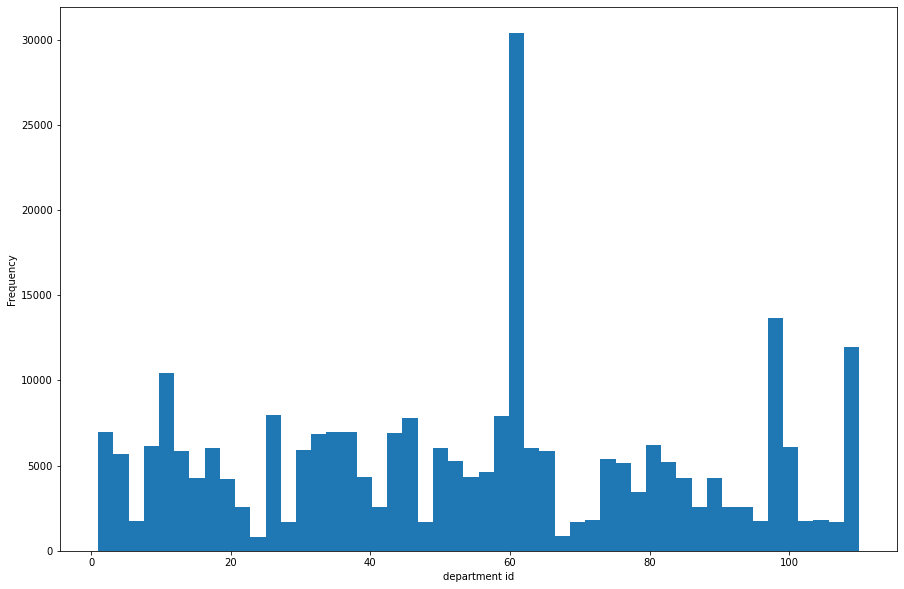

In [23]:
# Frequency Plot of Department id
fig = plt.figure(figsize=(15,10))
df['product_class_id'].plot.hist(bins = 50)
plt.xlabel('department id');

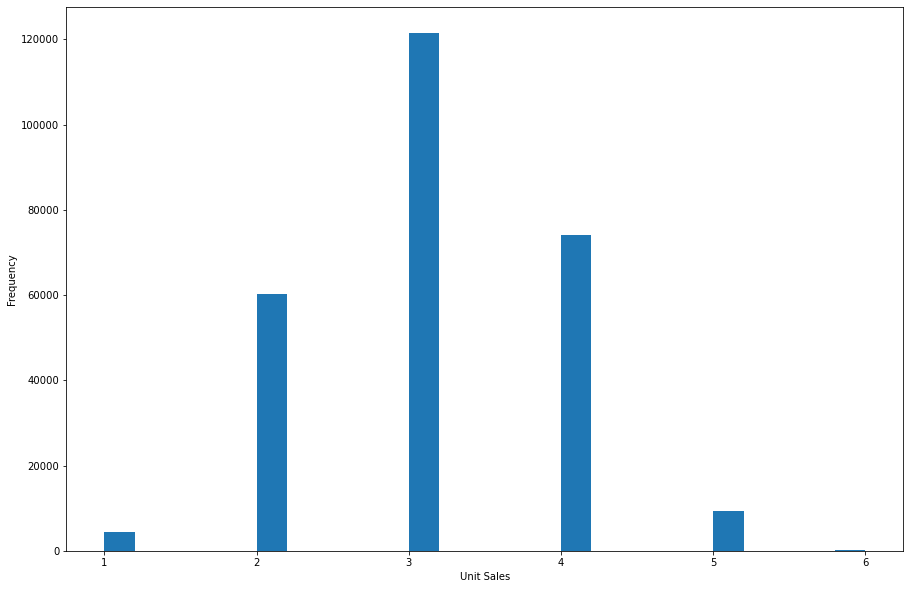

In [24]:
# Frequency plot of unit sales
fig=plt.figure(figsize=(15,10))
df['unit_sales'].plot.hist(bins = 25)
plt.xlabel('Unit Sales');

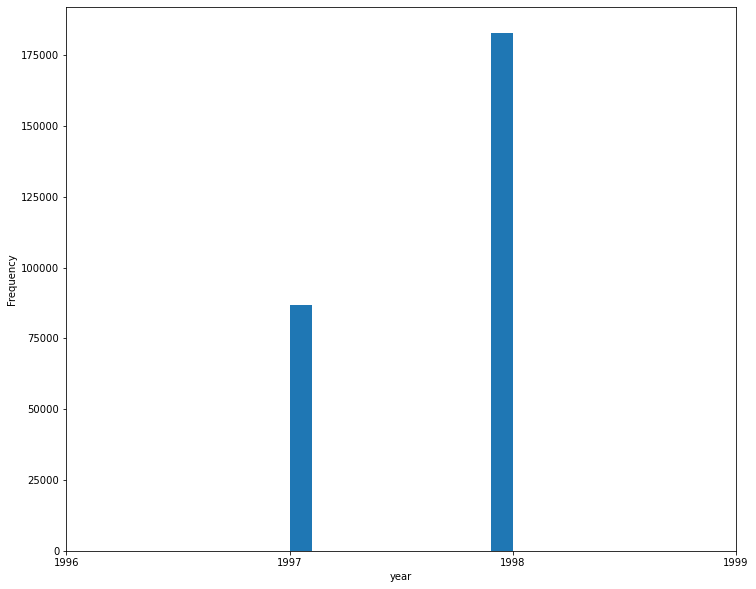

In [25]:
# Year with the highest order rate
fig=plt.figure(figsize=(12,10))
df['the_year'].plot.hist(bins=10)
plt.xlabel('year')
plt.xticks([1996,1997,1998,1999]);

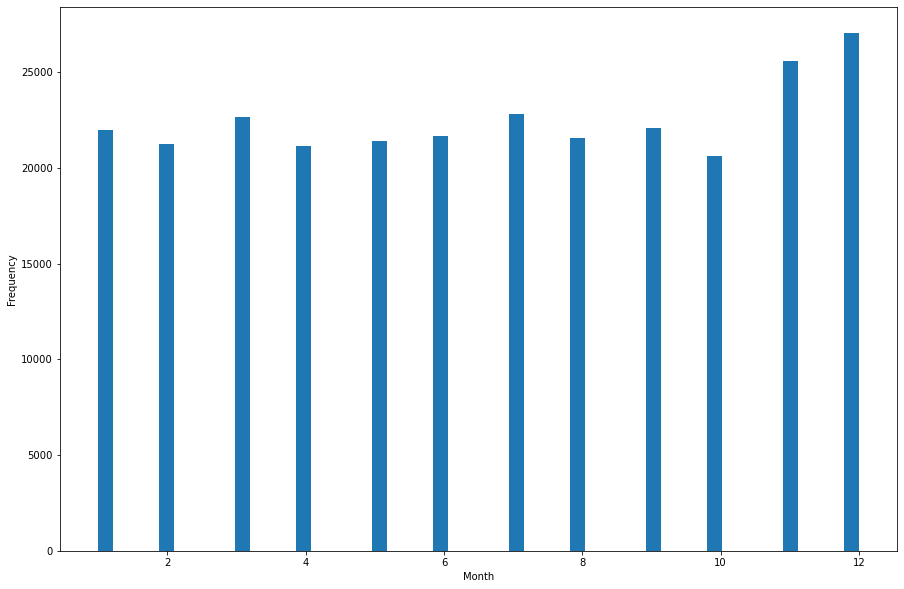

In [26]:
# Month with the highest order rate
fig=plt.figure(figsize=(15,10))
df['the_month'].plot.hist(bins=50)
plt.xlabel('Month');

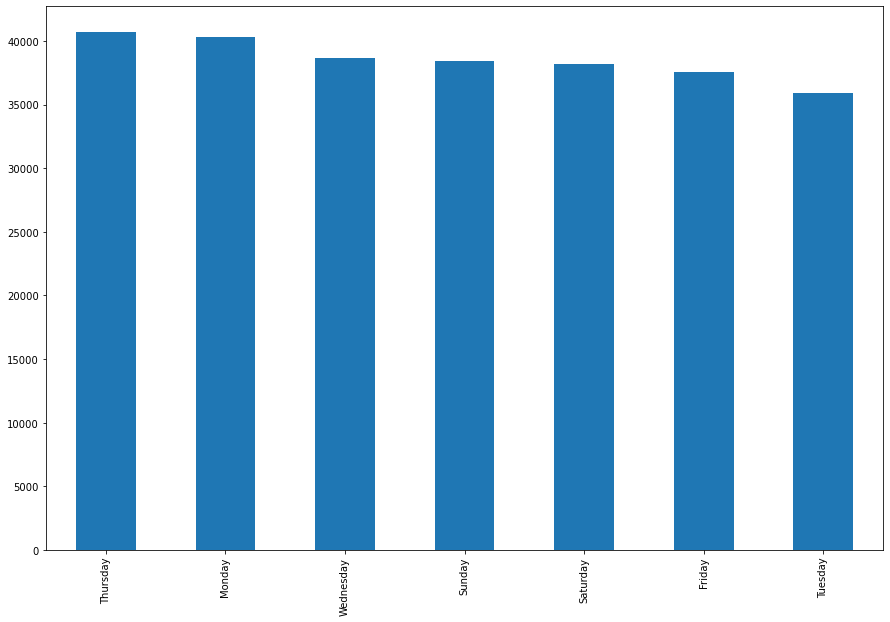

In [27]:
df_day_freq=df['the_day'].value_counts()
fig=plt.figure(figsize=(15, 10))
df_day_freq.plot.bar() ;

In [28]:
# Top 10 choices in Products
df['products'] = 'Products'
products = df.truncate(before = 605, after = 615)

products = nx.from_pandas_edgelist(products, source = 'products', target = 'product_name', edge_attr = True)

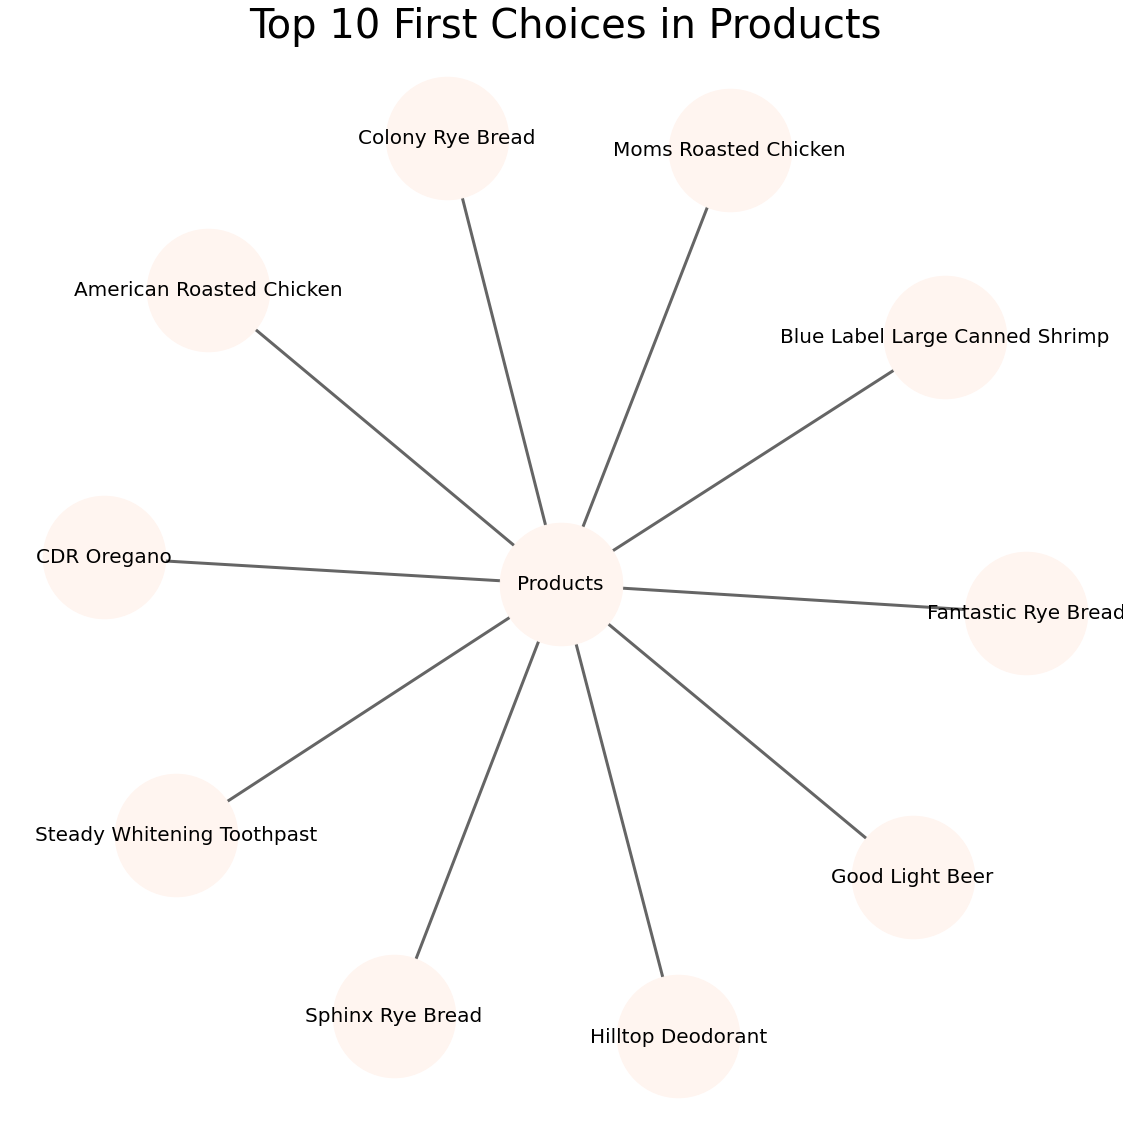

In [29]:
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=(20,20)
pos=nx.spring_layout(products)
color=plt.cm.Reds(np.linspace(0,15,1))
nx.draw_networkx_nodes(products,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(products, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(products, pos, font_size = 20)
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices in Products', fontsize = 40)
plt.show();